## Name : MEET ASHISH SHAH
### Mall Customer Segmentation Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

Read to data into pandas dataframe

In [2]:
mall_data = pd.read_csv('Mall_Customers.csv')
mall_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


We can get basic info on the dataframe such as the columns, datatypes & non-null count

In [3]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Using sns plots to find relationship between various columns of dataframe

<Axes: xlabel='Age', ylabel='Density'>

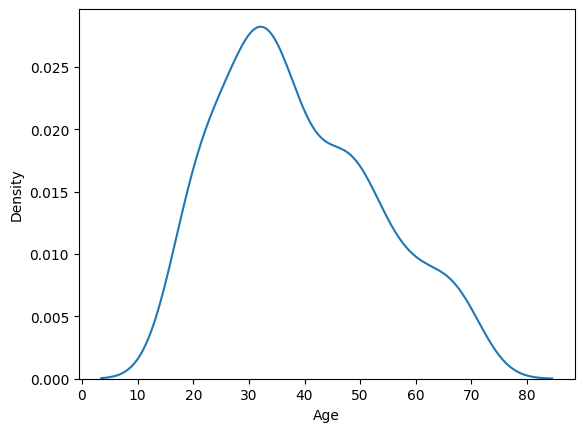

In [5]:
sns.kdeplot(data=mall_data, x='Age')
# Most customers lie around the age group of 30-40

C:\Users\HP\AppData\Local\Temp\ipykernel_8328\2370068275.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mall_data, x='Gender', palette='Set2')


<Axes: xlabel='Gender', ylabel='count'>

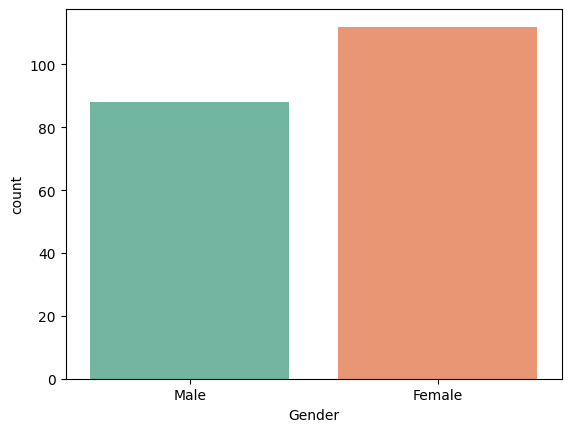

In [6]:
sns.countplot(data=mall_data, x='Gender', palette='Set2')
# More no. of female customers

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

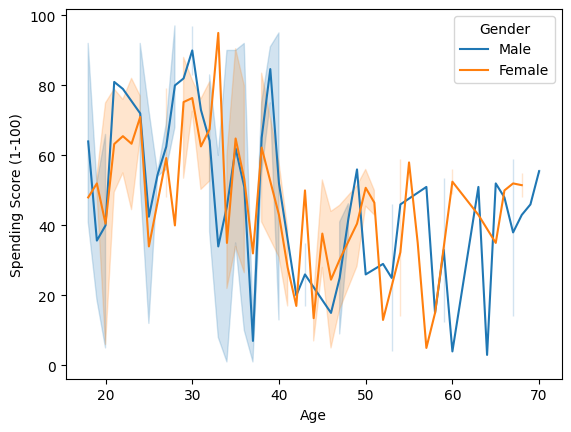

In [7]:
sns.lineplot(data=mall_data, x='Age', y='Spending Score (1-100)', hue='Gender')
# We can see women have more spending score on avg than men

In [8]:
X = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


Using K-means Clustering to group the customers

In [9]:
inertia = []
for i in range(3,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42, max_iter=200)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of

Text(0, 0.5, 'inertia')

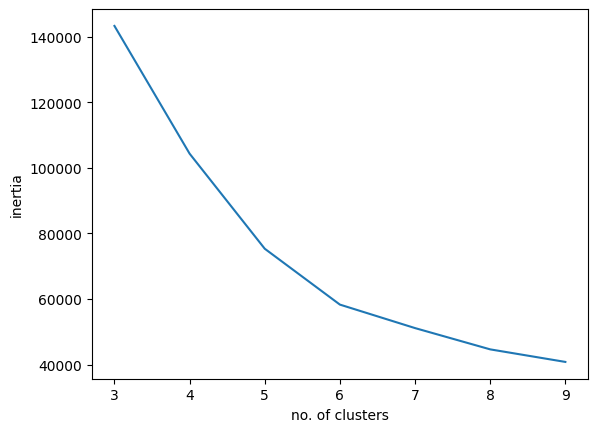

In [10]:
plt.plot(range(3, 10), inertia)
plt.xlabel('no. of clusters')
plt.ylabel('inertia')
# We can see the elbow occurs at no. of clusters = 6

In [11]:
# Fit k-means clustering algorithm to the dataset
kmeans_model = KMeans(n_clusters=6, init='k-means++', random_state=42, max_iter=200)
kmeans_model.fit(X)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=200, n_clusters=6, random_state=42)

In [12]:
# We can get the computed cluster centroids
centroids = kmeans_model.cluster_centers_

In [13]:
y_kmeans = kmeans_model.fit_predict(X)
y_kmeans

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 0, 3,
       5, 2, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 4, 3, 4, 1, 4, 1, 4, 1, 4,
       3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

Visualizing all clusters

In [14]:
np.squeeze(np.argwhere(y_kmeans == i))

array([], dtype=int64)

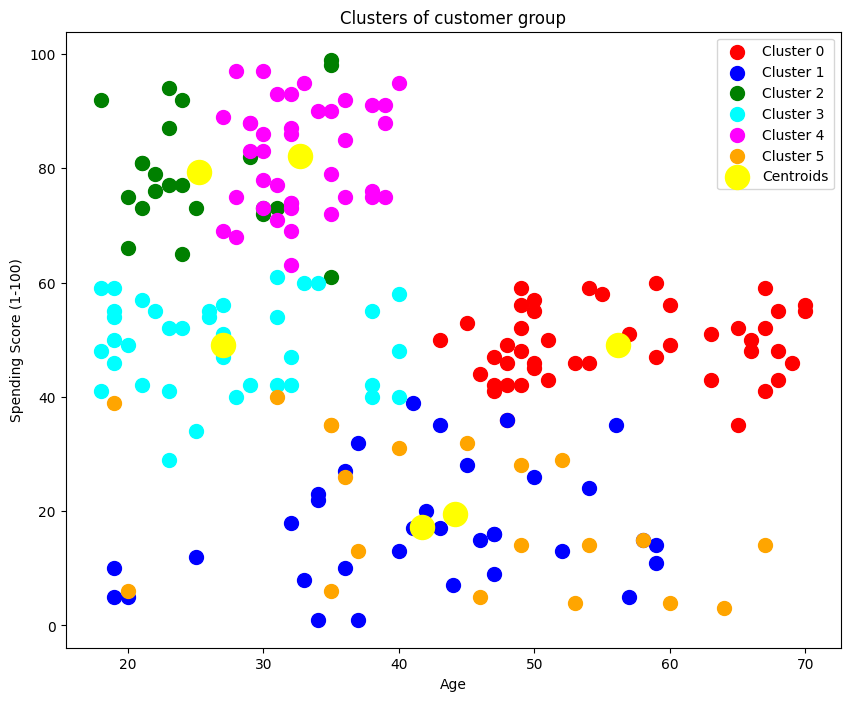

In [15]:
clusters = [0, 1, 2, 3, 4, 5]
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'orange']

plt.figure(figsize=(10, 8))
# Clusters for Age and Spending Score
for i in range(6):
  plt.scatter(X.iloc[np.squeeze(np.argwhere(y_kmeans == i)), 0], X.iloc[np.squeeze(np.argwhere(y_kmeans == i)), 2], s = 100, c = colors[i], label = f'Cluster {i}')

plt.scatter(centroids[:, 0], centroids[:, 2], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customer group')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()

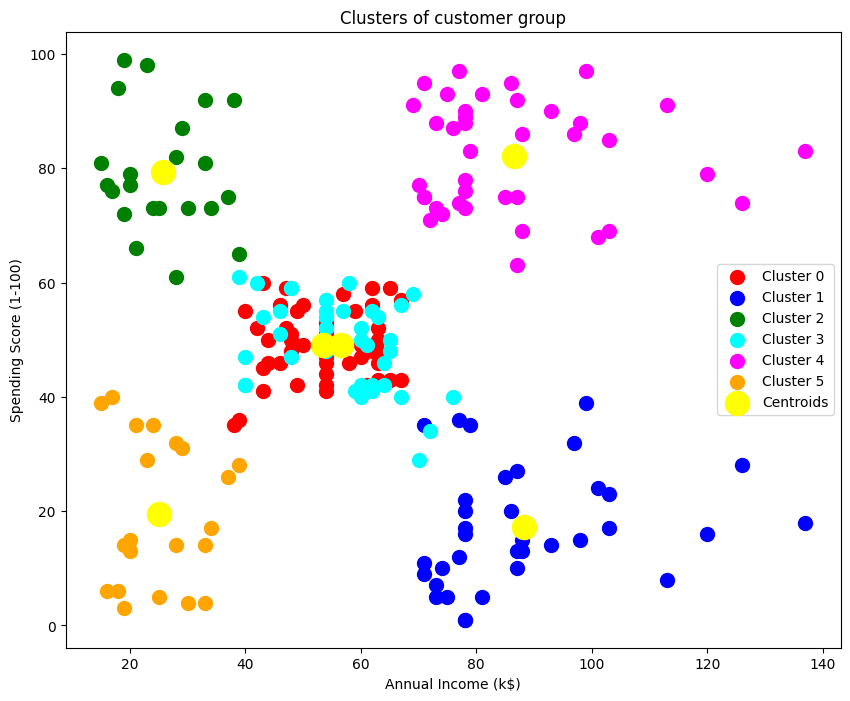

In [16]:
plt.figure(figsize=(10, 8))
# Clusters for Annual Income and Spending Score
for i in range(6):
  plt.scatter(X.iloc[np.squeeze(np.argwhere(y_kmeans == i)), 1], X.iloc[np.squeeze(np.argwhere(y_kmeans == i)), 2], s = 100, c = colors[i], label = f'Cluster {i}')

plt.scatter(centroids[:, 1], centroids[:, 2], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customer group')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

Analysis on Customer groups

In [17]:
x_data_c1 = X.iloc[np.squeeze(np.argwhere(y_kmeans == 0)), :]
x_data_c2 = X.iloc[np.squeeze(np.argwhere(y_kmeans == 1)), :]
x_data_c3 = X.iloc[np.squeeze(np.argwhere(y_kmeans == 2)), :]
x_data_c4 = X.iloc[np.squeeze(np.argwhere(y_kmeans == 3)), :]
x_data_c5 = X.iloc[np.squeeze(np.argwhere(y_kmeans == 4)), :]
x_data_c6 = X.iloc[np.squeeze(np.argwhere(y_kmeans == 5)), :]
cluster_grps = [x_data_c1, x_data_c2, x_data_c3, x_data_c4, x_data_c5, x_data_c6]

In [18]:
age_means = [np.mean(clust_i['Age']) for clust_i in cluster_grps]
annual_inc_means = [np.mean(clust_i['Annual Income (k$)']) for clust_i in cluster_grps]
spending_scr_means = [np.mean(clust_i['Spending Score (1-100)']) for clust_i in cluster_grps]

Avg. Age distribution among 6 cluster groups

Text(0, 0.5, 'Age')

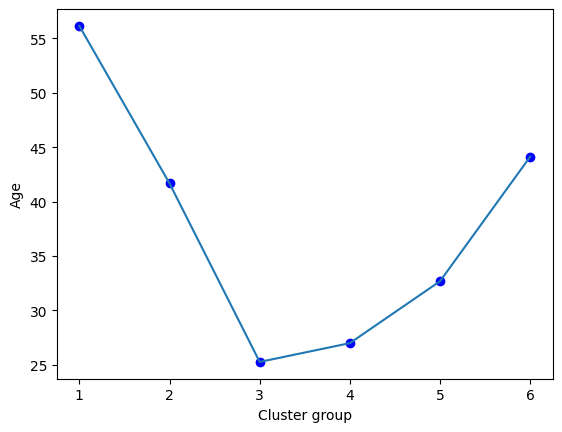

In [19]:
plt.plot(range(1, 7), age_means, 'bo')
plt.plot(range(1, 7), age_means, '-')
plt.xlabel('Cluster group')
plt.ylabel('Age')
# Cluster group 3 is the YOUNGEST and group 1 is the OLDEST

Avg. Annual Income distribution among 6 cluster groups

Text(0, 0.5, 'Annual Income')

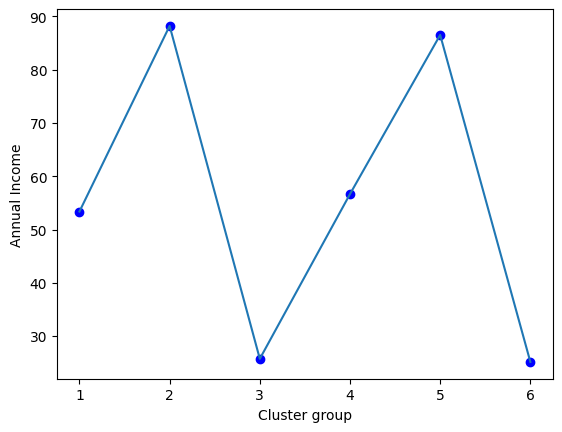

In [20]:
plt.plot(range(1, 7), annual_inc_means, 'bo')
plt.plot(range(1, 7), annual_inc_means, '-')
plt.xlabel('Cluster group')
plt.ylabel('Annual Income')
# Groups 3 & 6 have the lowest Annual income with Groups 2 & 5 ranking the highest

Avg. Spending Score distribution among 6 cluster groups

Text(0, 0.5, 'Spending Score')

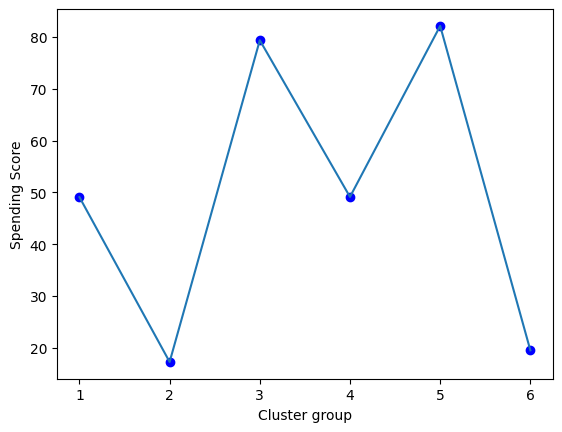

In [21]:
plt.plot(range(1, 7), spending_scr_means, 'bo')
plt.plot(range(1, 7), spending_scr_means, '-')
plt.xlabel('Cluster group')
plt.ylabel('Spending Score')
# Group 5 & 3 have the highest spending score with 2 & 6 ranking lowest